## Brady Neeb
## Madelon Non-Linear SVM Challenge
#### For this challenge, you will create and fit support vector machines as classifiers for the Madelon synthetic dataset from OpenML (Links to an external site.) using SciKit-Learn. You can do this locally or on Google Colab (Links to an external site.).

#### The Madelon dataset is a synthetic dataset that's designed to be difficult and highly non-linear. It was developed by Isabelle Guyon (Links to an external site.), et al. [1]

#### "Madelon is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute five informative features. Fifteen linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the two classes. We added a number of distractor features called 'probes' having no predictive power. The order of the features and patterns were randomized."

#### Again, this is a hard dataset. For more on this dataset, see: https://archive.ics.uci.edu/ml/datasets/madelon

In [2]:
# Open the data set in a variable called databunch
from sklearn import datasets
databunch = datasets.fetch_openml('madelon')

In [3]:
# Verify the dimentions of the data
print(databunch.data.shape)
print(databunch.target.shape)

(2600, 500)
(2600,)


In [4]:
# Split the data using train_test_split():
from sklearn.model_selection import train_test_split
X = databunch.data
Y = databunch.target
test_size = 0.2
random_state = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

In [5]:
# Verify training and testing data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2080, 500)
(520, 500)
(2080,)
(520,)


In [6]:
# Using the produced data sets from train_test_split(), create the model using SVC Classifier
from sklearn import svm

svc_model = svm.SVC() 
svc_model.fit(X_train, Y_train)

SVC()

In [7]:
# Default SVC model score
svc_model.score(X_test, Y_test)

0.6538461538461539

In [8]:
# Using GridSearchCV to search combinations of kernels, C and gamma values.
from sklearn.model_selection import GridSearchCV

kernels = ['poly', 'rbf']
c_values = [0.001, 0.01, 0.1, 1, 3, 5]
gamma_values = ['scale', 'auto']
param_grid = [
    {'kernel': kernels, 
    'C': c_values, 
    'gamma': gamma_values}]
gscv = GridSearchCV(svc_model, param_grid, scoring='accuracy')
gscv.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 3, 5],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['poly', 'rbf']}],
             scoring='accuracy')

In [10]:
# Check the estimators
estimator = gscv.best_estimator_
print(estimator)
estimator.score(X_test, Y_test)

SVC(C=5)


0.6653846153846154

In [14]:
# Trying some more refined parameters
kernels = ['poly', 'rbf']
c_values = [3, 4, 5, 6, 7, 8]
gamma_values = ['scale', 'auto']
param_grid = [
    {'kernel': kernels, 
    'C': c_values, 
    'gamma': gamma_values}]
gscv = GridSearchCV(svc_model, param_grid, scoring='accuracy')
gscv.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [3, 4, 5, 6, 7, 8], 'gamma': ['scale', 'auto'],
                          'kernel': ['poly', 'rbf']}],
             scoring='accuracy')

In [15]:
# Check the estimators on the newly refined parameters
refined_estimator = gscv.best_estimator_
print(refined_estimator)
refined_estimator.score(X_test, Y_test)

SVC(C=4)


0.6634615384615384

### After refining, it turns out the initial estimator was best at 66.5% accuracy. Next, I will apply this estimator to a pipeline with StandardScaler and Principal Component Analysis

In [16]:
# Try to improve using StandardScaler and Pipelines
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, Y_train)
scaler.transform(X_train)

array([[ 0.67204433,  0.60858403, -0.44006546, ..., -0.29667925,
        -1.22328227,  0.87173526],
       [-1.83559501, -1.35894494,  0.4853734 , ..., -2.00258493,
        -1.2769718 , -0.6880818 ],
       [-1.20868517,  0.74197582,  0.09977388, ...,  0.51918869,
         1.21959112,  0.28680386],
       ...,
       [ 0.04513449, -1.09216135, -0.56859864, ..., -0.66752831,
         0.30686919,  1.84662093],
       [ 0.35858941,  0.67527993,  0.38254686, ...,  0.        ,
         0.28002443,  0.13082216],
       [-0.11159296,  1.07545531,  0.99950611, ..., -0.37084906,
        -0.55216321, -0.84406351]])

In [19]:
# Create a pipeline using Scaler, PCA and svc model
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

scores = []

for i in range(1, 25):
    pca = PCA(n_components=i)
    pca.fit(X_train, Y_train)
    pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svc', estimator)])
    pipe.fit(X_train, Y_train)
    scores.append(pipe.score(X_test, Y_test))
    print(f"n={i}: Score: {scores[i-1]}")

n=1: Score: 0.675
n=2: Score: 0.6788461538461539
n=3: Score: 0.7230769230769231
n=4: Score: 0.8076923076923077
n=5: Score: 0.8596153846153847
n=6: Score: 0.8442307692307692
n=7: Score: 0.8442307692307692
n=8: Score: 0.8346153846153846
n=9: Score: 0.8307692307692308
n=10: Score: 0.8038461538461539
n=11: Score: 0.7884615384615384
n=12: Score: 0.7903846153846154
n=13: Score: 0.7942307692307692
n=14: Score: 0.7961538461538461
n=15: Score: 0.7653846153846153
n=16: Score: 0.7730769230769231
n=17: Score: 0.7653846153846153
n=18: Score: 0.7769230769230769
n=19: Score: 0.7596153846153846
n=20: Score: 0.7461538461538462
n=21: Score: 0.7730769230769231
n=22: Score: 0.7519230769230769
n=23: Score: 0.75
n=24: Score: 0.7634615384615384


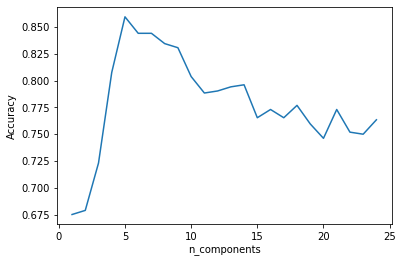

In [20]:
# Plot the scores:
import matplotlib.pyplot as plt
plt.plot(range(1, 25), scores)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.show()

## There is a clear peak of performance when n=5. The maximum accuracy here is 85.4%. This will conclude this model.